In [2]:
import pandas as pd
import numpy as np
np.float_ = np.float64

from src.create_data_files import combine_files, create_matrix, plot_processed_data, create_processed_file
from src.model_testing import ModelTesting
from src.read_signal_pdf import pdf_signal_csv

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

main_folder = "csv/"
data_folder = main_folder + 'data/'
hea_folder = main_folder + 'extra/'

# PDF to CSV

There are 4 pdfs in pdf/
File 0: 553246736447566B58312B794B734A4C4D4A715933366163476B74392B517A693232676C6A3035493557453D0A already read
File 1: 553246736447566B583139674A535A4F466438394F356E4769776471534B7846306C6235375369436D6A303D0A
PDF to SVG ...


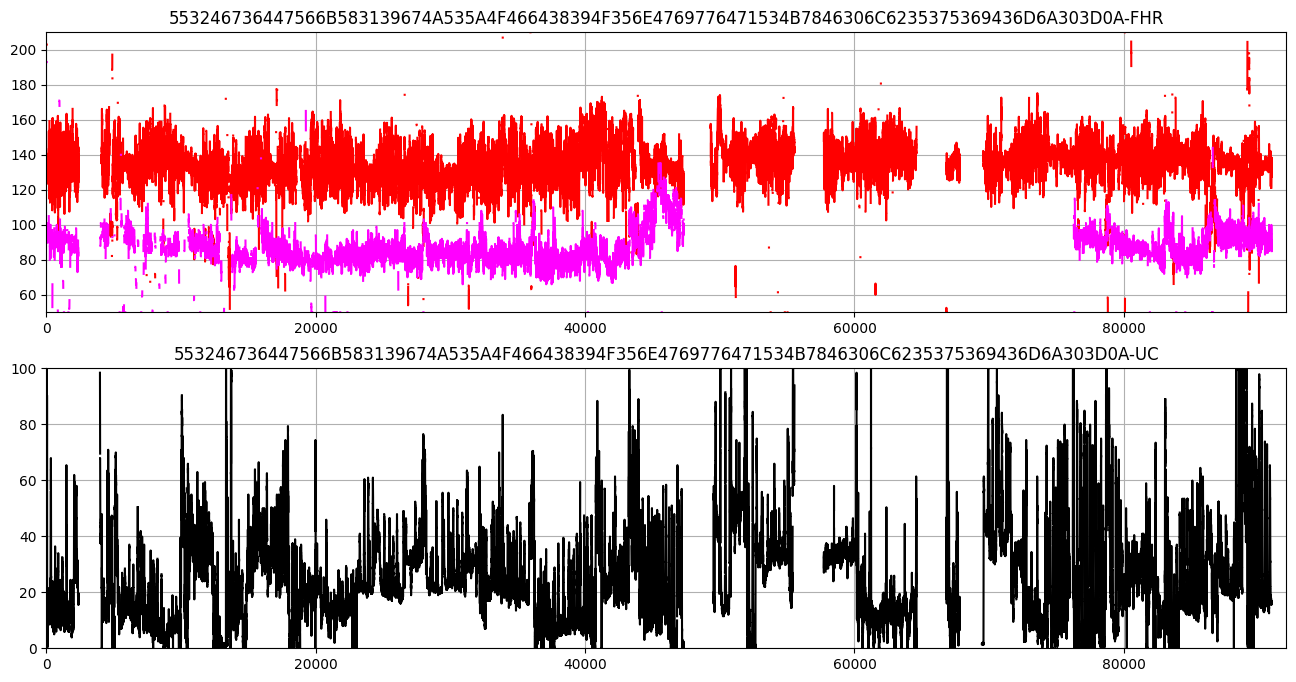

File 2: prueba already read
File 3: 553246736447566B5831397032323778584E306F785149437550364B3738384A6248644E746330662F446F3D0A
PDF to SVG ...


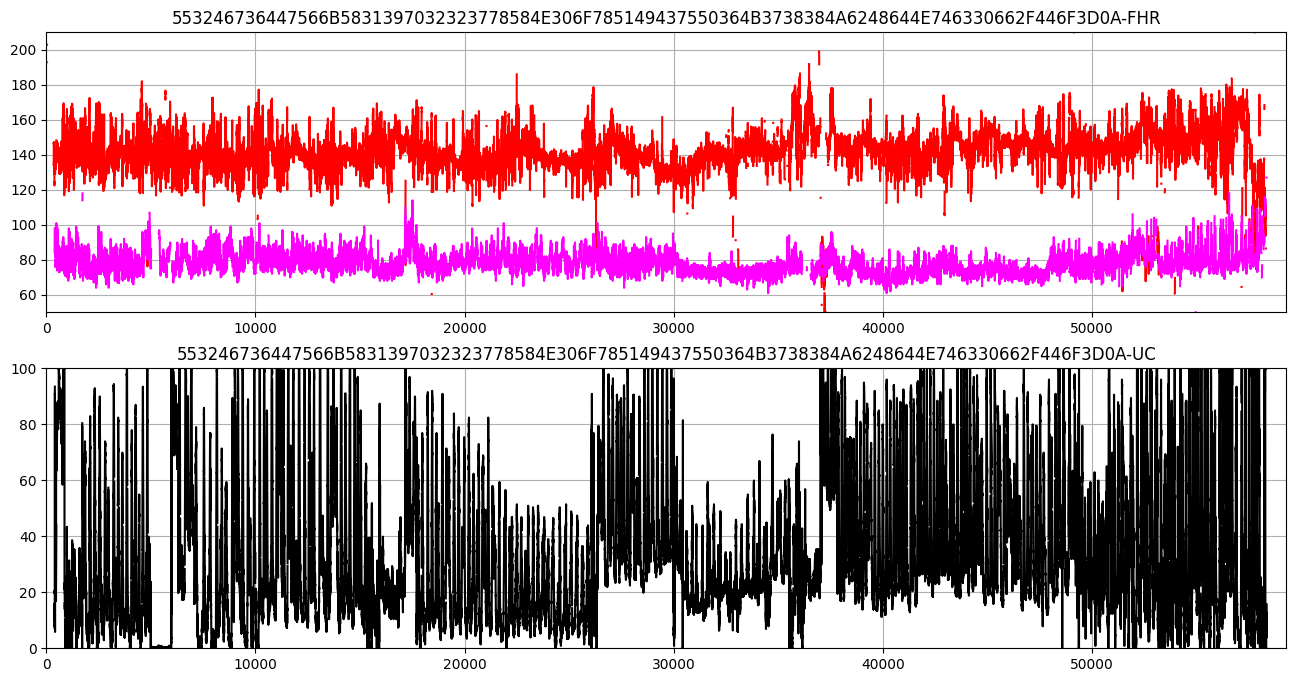

In [52]:
# Converts the pdf signal to csv and plots the result data
pdf_signal_csv()

C:\Users\claud\AppData\Local\Temp\ipykernel_20580\2347848301.py:5: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename +'.csv', compression='gzip')


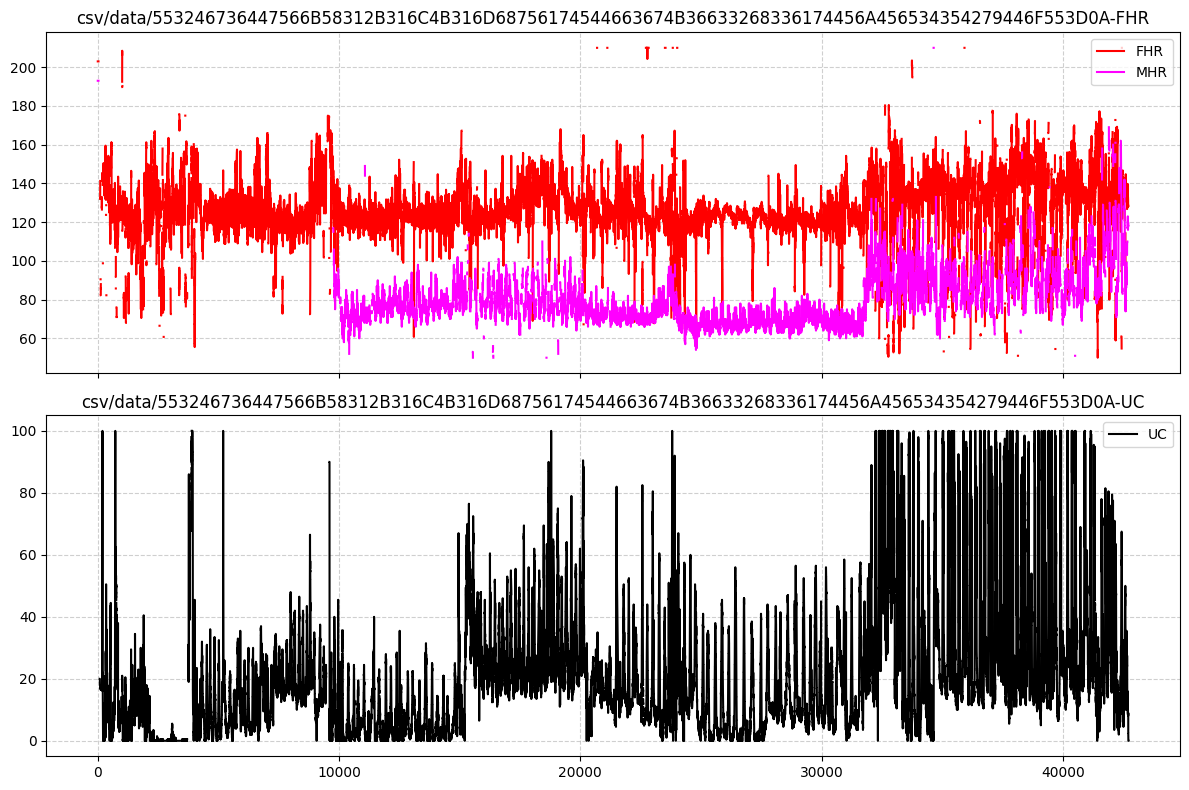

In [ ]:
# Plot the CSV data to compare with the original data
import matplotlib.pyplot as plt

filename = "csv/data/553246736447566B58312B316C4B316D68756174544663674B36633268336174456A456534354279446F553D0A"

df = pd.read_csv(filename +'.csv', compression='gzip')

for col in ['Elapsed Time', 'FHR', 'UC', 'MHR']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Elapsed Time'] -= df['Elapsed Time'].min()


fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Subgraph 1: FHR and MHR
axes[0].plot(df['Elapsed Time'], df['FHR'], color='red', label='FHR')
axes[0].plot(df['Elapsed Time'], df['MHR'], color='magenta', label='MHR')
axes[0].set_title(f'{filename}-FHR')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)


# Subgraph 2: UC
axes[1].plot(df['Elapsed Time'], df['UC'], color='black', label='UC')
axes[1].set_title(f'{filename}-UC')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Preprocesar ficheros

### Preprocesar datos y unificarlos en un archivo

In [ ]:
# Convine all csv in a single file
combine_files(data_folder, main_folder, compressed=True, extra_data=True)

# Process the convined data and store in another file
create_processed_file(main_folder)

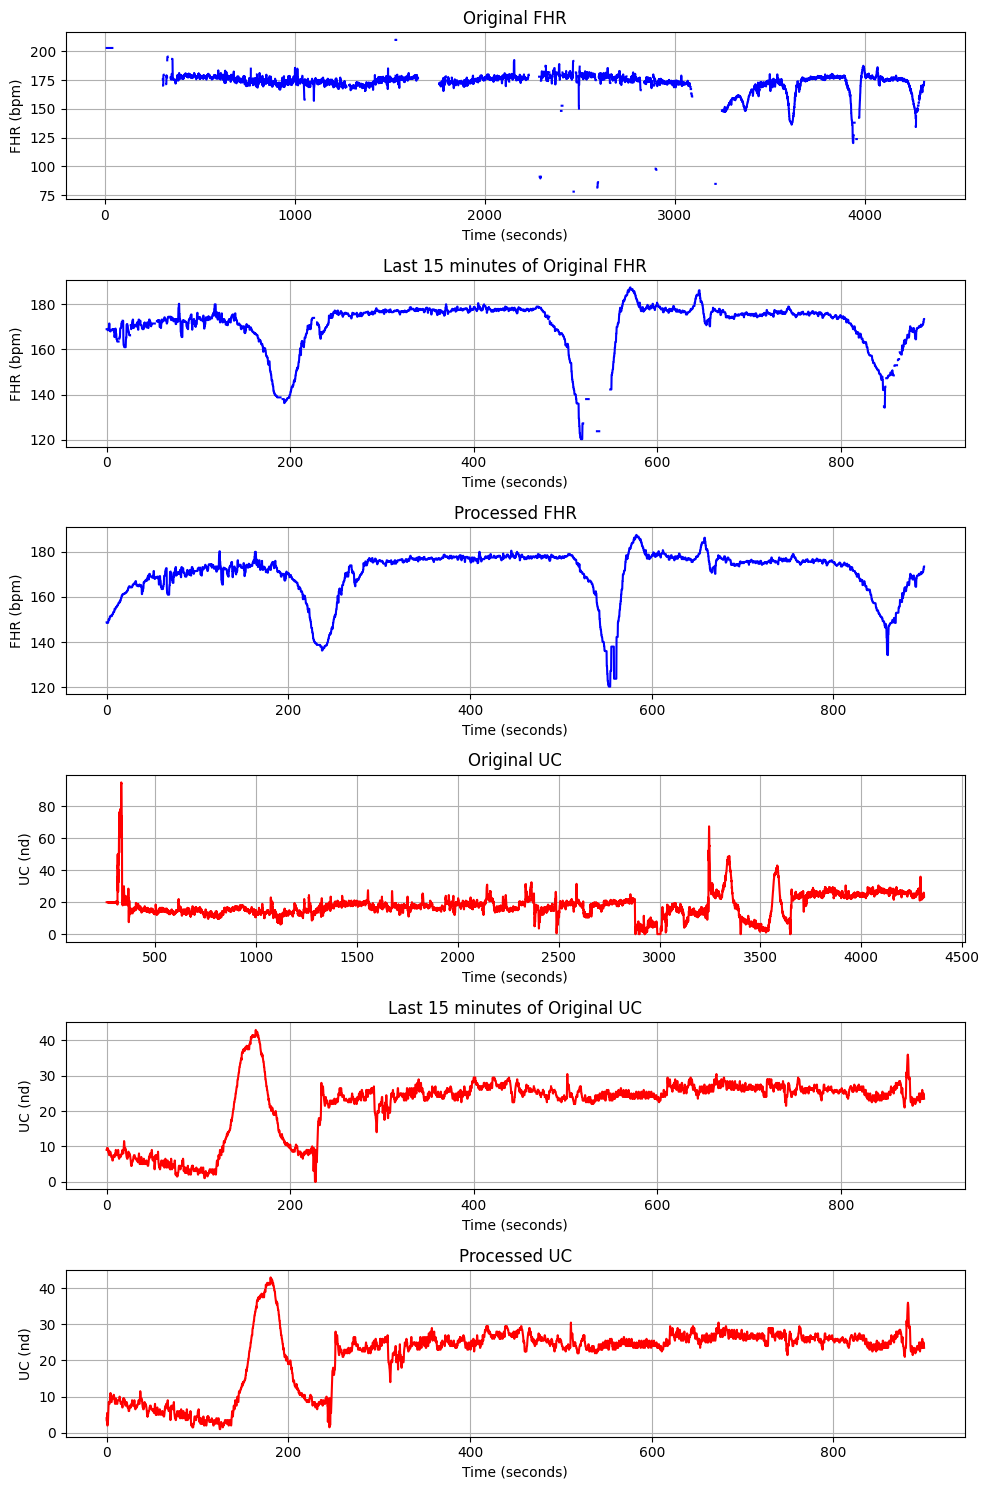

In [9]:
###### Plot the original and processed data to see the differences ######
plot_processed_data("553246736447566B58312B2F5A5A624948486D4A4D3064734E564B4B434D3139794D566B7838533457306F3D0A", "csv/data/", "csv/", compression=True)

### Crear archivos de características

In [ ]:
##### Create a matrix with the features and the class ######
create_matrix(hea_folder, main_folder, ['linear'], excel=True)
create_matrix(hea_folder, main_folder, ['nonlinear'], excel=True)
create_matrix(hea_folder, main_folder, ['morphological'], excel=True)

create_matrix(hea_folder, main_folder, ['linear', 'nonlinear'], excel=True)
create_matrix(hea_folder, main_folder, ['linear', 'morphological'], excel=True)
create_matrix(hea_folder, main_folder, ['nonlinear', 'morphological'], excel=True)

create_matrix(hea_folder, main_folder, ['linear', 'nonlinear', 'morphological'], excel=True)

In [11]:
# Show features file
df = pd.read_csv(main_folder + 'linear_nonlin_morpho' + '_features.csv')
df

,FileName,mean,std,LTV,delta,STV,II,ApEn_0.15,ApEn_0.20,SampEn_0.15,SampEn_0.20,LZC,baseline,dcc,acc,pH
0,553246736447566B58312B2F5A5A624948486D4A4D3064...,170.598521,10.670681,18.463704,20.832855,1.446417,0.136495,0.184022,0.184022,2.197225,2.197225,0.715390,173.781104,4.0,0.0,1
1,553246736447566B58312B3165796E784F52487661414A...,135.514637,20.002462,16.420987,51.681791,5.226239,0.271870,0.037284,0.037284,inf,inf,0.692419,139.825193,8.0,3.0,0
2,553246736447566B58312B316C4B316D68756174544663...,131.972441,18.029820,16.210027,52.965960,5.826276,0.337948,0.031964,0.031964,inf,inf,0.659603,132.219270,7.0,5.0,0
3,553246736447566B58312B3368325446372B703456446C...,150.003481,18.807586,17.290825,46.398431,4.689424,0.255793,0.048857,0.048847,2.833213,2.197225,0.754769,156.624668,7.0,4.0,0
4,553246736447566B58312B35675553695458594432336A...,132.452480,23.827231,16.214632,52.649355,5.324252,0.228811,0.041120,0.041120,0.352221,0.352221,0.685856,130.433460,9.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,553246736447566B583139755A54514C4277714D6B2B5A...,172.807586,3.264797,18.589643,10.885333,1.018627,0.321438,0.325104,0.355979,2.251292,2.243745,0.902442,173.010587,0.0,0.0,0
324,553246736447566B583139766A6A695A6B42635145654A...,145.969600,9.226153,17.079594,29.798000,4.057234,0.461819,0.024241,0.028103,inf,inf,0.872907,146.851775,6.0,2.0,0
325,553246736447566B58313976716374502B75525459356A...,145.463742,9.570002,17.048664,29.390667,3.862969,0.430165,0.056591,0.075098,inf,inf,0.761333,146.629062,6.0,2.0,0
326,553246736447566B583139783833486D4A435643543748...,174.937883,3.598620,18.703863,11.426000,1.353841,0.384455,0.174541,0.193673,3.931826,2.708050,0.866344,174.739190,0.0,0.0,1


# Clasificadores

In [12]:
models = [
    {"name": "Logistic Regression", 
        "model": LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'), 
        "params": {
            'C': np.logspace(-3, 4, num=8),
            'penalty': ['l1', 'l2']
        },
        "standardize": True
    },
    {"name": "SVC lineal", 
        "model": SVC(kernel='linear', class_weight='balanced'), 
        "params": {
            'C': np.logspace(-3, 4, num=8)
        },
        "standardize": True
    },
    {"name": "SVC radial", 
        "model": SVC(kernel='rbf', class_weight='balanced'), 
        "params": {
            'C': np.logspace(-3, 4, num=8), 
            'gamma': np.logspace(-4, 3, num=8)
        },
        "standardize": True
    },
    {"name": "SVC polinómico", 
        "model": SVC(kernel='poly', class_weight='balanced'), 
        "params": {
            'C': np.logspace(-3, 4, num=8), 
            'degree': [2, 3, 4], 
            'coef0': [0.0, 0.5, 1.0]
        },
        "standardize": True
    },
    {"name": "SVC sigmoide", 
        "model": SVC(kernel='sigmoid', class_weight='balanced'), 
        "params": {
            'C': np.logspace(-3, 4, num=8), 
            'gamma': ['scale', 'auto', 0.1, 1.0, 10], 
            'coef0': [0.0, 0.5, 1.0]
        },
        "standardize": True
    },
    {"name": "Random Forest", 
        "model": RandomForestClassifier(class_weight='balanced', n_jobs=-1), 
        "params": {
            'n_estimators': [50, 100, 200]
        },
        "standardize": False
    },
    {"name": "MLP", 
        "model": MLPClassifier(max_iter=1000), 
        "params": {
            'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 100), (200, 200), (50, 50, 50), (100, 100, 100)],  
            'alpha': [0.0001, 0.001, 0.01],  
        },  
        "standardize": True
    },
    {"name": "KNN", 
        "model": KNeighborsClassifier(), 
        "params": {
            'n_neighbors': [3, 5, 7, 9], 
            'weights': ['uniform', 'distance']
        },
        "standardize": True
    }
]


features = [
    {"name": "Lineales", "file_name": "linear_features.csv"},
    {"name": "No lineales", "file_name": "nonlinear_features.csv"},
    {"name": "Morfológicas", "file_name": "morphological_features.csv"},
    {"name": "Lineales y no lineales", "file_name": "linear_nonlin_features.csv"},
    {"name": "Lineales y morfológicas", "file_name": "linear_morpho_features.csv"},
    {"name": "No lineales y morfológicas", "file_name": "nonlin_morpho_features.csv"},
    {"name": "Todas", "file_name": "linear_nonlin_morpho_features.csv"}
]


# Entrenamiento

In [13]:
# Diccionary to store the results
resultados_acc = {model["name"]: [] for model in models}
resultados_f1 = {model["name"]: [] for model in models}

# Iterate over models and features
for model in models:
    for feature in features:
        print(f"Modelo: {model['name']} \n\tCaracterísticas: {feature['name']}")

        model_test = ModelTesting(
            model['model'],
            file_name=feature['file_name'],
            standardize=model['standardize'],
            main_folder=main_folder
        )
        
        # Trains the model with cross-validation and hyperparameter search
        results = model_test.train_model(
            param_grid=model["params"]
        )

        # Store the result in the dictionary
        resultados_acc[model["name"]].append(results[0])
        resultados_f1[model["name"]].append(results[1])

# Create DataFrames with the results
acc_df = pd.DataFrame(resultados_acc, index=[feature["name"] for feature in features]).map(lambda x: f"{x:.3f}")
f1_df = pd.DataFrame(resultados_f1, index=[feature["name"] for feature in features]).map(lambda x: f"{x:.3f}")

# Function to highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #d9b8d0; color: black' if v else '' for v in is_max]

acc_df = acc_df.style.apply(highlight_max, axis=0)
f1_df = f1_df.style.apply(highlight_max, axis=0)

Modelo: Logistic Regression 
	Características: Lineales
Modelo: Logistic Regression 
	Características: No lineales
Modelo: Logistic Regression 
	Características: Morfológicas
Modelo: Logistic Regression 
	Características: Lineales y no lineales
Modelo: Logistic Regression 
	Características: Lineales y morfológicas
Modelo: Logistic Regression 
	Características: No lineales y morfológicas
Modelo: Logistic Regression 
	Características: Todas
Modelo: SVC lineal 
	Características: Lineales
Modelo: SVC lineal 
	Características: No lineales
Modelo: SVC lineal 
	Características: Morfológicas
Modelo: SVC lineal 
	Características: Lineales y no lineales
Modelo: SVC lineal 
	Características: Lineales y morfológicas
Modelo: SVC lineal 
	Características: No lineales y morfológicas
Modelo: SVC lineal 
	Características: Todas
Modelo: SVC radial 
	Características: Lineales
Modelo: SVC radial 
	Características: No lineales
Modelo: SVC radial 
	Características: Morfológicas
Modelo: SVC radial 
	Caracter

c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the opti

Modelo: MLP 
	Características: Lineales y no lineales
Modelo: MLP 
	Características: Lineales y morfológicas
Modelo: MLP 
	Características: No lineales y morfológicas


c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the opti

Modelo: MLP 
	Características: Todas


c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the opti

Modelo: KNN 
	Características: Lineales
Modelo: KNN 
	Características: No lineales
Modelo: KNN 
	Características: Morfológicas
Modelo: KNN 
	Características: Lineales y no lineales
Modelo: KNN 
	Características: Lineales y morfológicas
Modelo: KNN 
	Características: No lineales y morfológicas
Modelo: KNN 
	Características: Todas


# Resultados

### Balanced accuracy

In [14]:
acc_df

,Logistic Regression,SVC lineal,SVC radial,SVC polinómico,SVC sigmoide,Random Forest,MLP,KNN
Lineales,0.601,0.555,0.566,0.566,0.588,0.494,0.485,0.507
No lineales,0.534,0.522,0.549,0.546,0.550,0.522,0.471,0.523
Morfológicas,0.560,0.537,0.564,0.541,0.594,0.494,0.480,0.494
Lineales y no lineales,0.566,0.591,0.601,0.625,0.584,0.499,0.540,0.551
Lineales y morfológicas,0.585,0.553,0.575,0.570,0.583,0.492,0.505,0.510
No lineales y morfológicas,0.569,0.558,0.563,0.519,0.570,0.486,0.456,0.538
Todas,0.572,0.580,0.603,0.619,0.618,0.489,0.531,0.595


### F1-score

In [15]:
f1_df

,Logistic Regression,SVC lineal,SVC radial,SVC polinómico,SVC sigmoide,Random Forest,MLP,KNN
Lineales,0.587,0.618,0.580,0.650,0.591,0.673,0.650,0.676
No lineales,0.583,0.572,0.448,0.534,0.571,0.694,0.641,0.700
Morfológicas,0.586,0.594,0.623,0.551,0.614,0.673,0.647,0.667
Lineales y no lineales,0.594,0.660,0.722,0.728,0.650,0.678,0.694,0.710
Lineales y morfológicas,0.579,0.615,0.614,0.600,0.666,0.672,0.662,0.688
No lineales y morfológicas,0.605,0.583,0.583,0.414,0.571,0.667,0.629,0.699
Todas,0.603,0.640,0.733,0.731,0.672,0.669,0.696,0.740


### Matriz de confusión para un modelo determinado

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV

# The model to be evaluated
model = SVC(kernel='rbf', class_weight='balanced')
param_grid = {
    'C': np.logspace(-3, 4, num=8), 
    'gamma': np.logspace(-4, 3, num=8)
}


# Evaluate the model with each feature set
confusion_matrices = {}
for feature in features:    
    model_test = ModelTesting(
        model,
        file_name=feature['file_name'],
        standardize=True,
        main_folder=main_folder
    )
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    grid_search.fit(model_test.X, model_test.y)
    
    model.set_params(**grid_search.best_params_)
    y_pred_cv = cross_val_predict(model, model_test.X, model_test.y, cv=cv)
    
    # Confusion matrix
    cm = confusion_matrix(model_test.y, y_pred_cv)
    
    # Store the confusion matrix in a DataFrame
    cm_df = pd.DataFrame(cm, index=np.unique(model_test.y), columns=np.unique(model_test.y))
    confusion_matrices[feature['name']] = cm_df
    
# Print the confusion matrices
for feature_name, cm_df in confusion_matrices.items():
    print(f"\n{feature_name}")
    print(cm_df)



Lineales
     0    1
0  133  121
1   29   45

No lineales
    0    1
0  83  171
1  17   57

Morfológicas
     0   1
0  156  98
1   36  38

Lineales y no lineales
     0   1
0  209  45
1   46  28

Lineales y morfológicas
     0    1
0  148  106
1   32   42

No lineales y morfológicas
     0    1
0  135  119
1   30   44

Todas
     0   1
0  217  37
1   48  26
